Повторить код из 05 файла, там где были хлопья. Постараться сделать больше.
Взять другую картинку и прогнать ее  через сегментацию изображения. Файл 07
Файл 08. Поиграться с обнаружением своего лица, чтобы было разным цветом глаза и нос. Рамочка непрозрачная
Записать видео
Снять видео машин и замазать номера машин на видео

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
metro = cv2.imread('../DATA/metro.jpg',0)

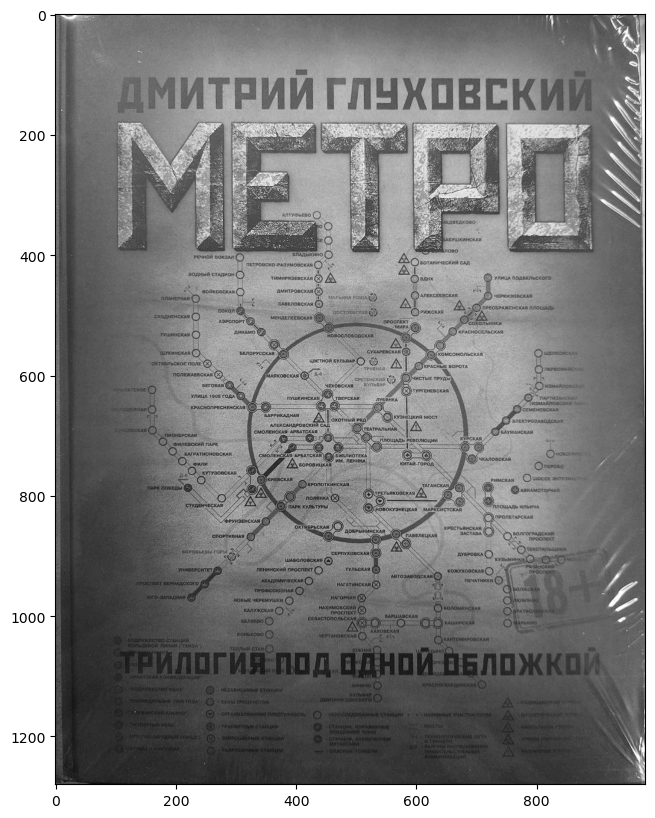

In [4]:
display(metro)

In [5]:
shell = cv2.imread('../DATA/shell.jpg', 0)

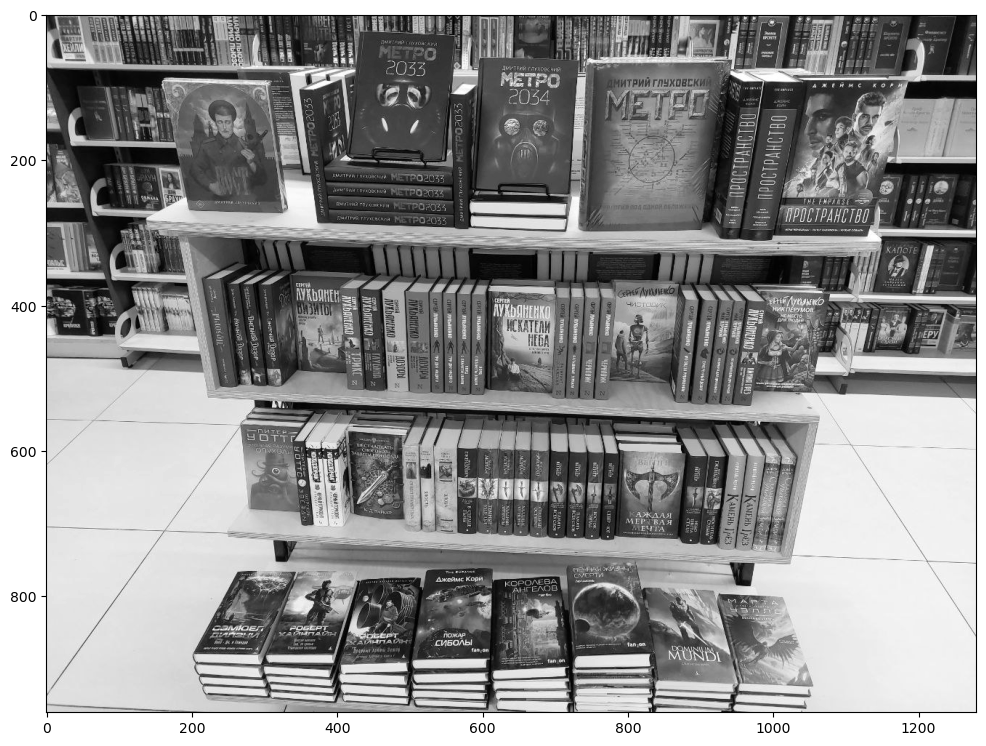

In [6]:
display(shell)

In [7]:
orb = cv2.ORB_create()


In [8]:
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(metro,None)
kp2, des2 = orb.detectAndCompute(shell,None)

In [9]:
kp1[:3]

(< cv2.KeyPoint 0000027939EB35D0>,
 < cv2.KeyPoint 0000027939EB34B0>,
 < cv2.KeyPoint 0000027939BE83C0>)

In [10]:
des1[:2]

array([[  8,  95,  23, 181,  50, 138,  52,  55,  60, 136, 122, 229, 183,
        167, 128,  80, 230,  63,  46,   0,  97, 152,   1,  46, 228, 167,
         50, 128,  40, 128, 129, 153],
       [ 77,  52, 181, 209, 169, 124, 168,   3, 202, 243, 139,  80, 221,
        114, 220, 239, 163,   5, 120,  56,  21, 197, 247, 128, 135, 249,
         91, 118, 138, 120, 195, 164]], dtype=uint8)

In [11]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

# Match descriptors
matches = bf.match(des1,des2)

# Sort them in the order of their distance
matches = sorted(matches, key = lambda x: x.distance)

# Draw first 25 matches
metro_matches = cv2.drawMatches(metro,kp1,shell,kp2,matches[:25], None,flags=2)


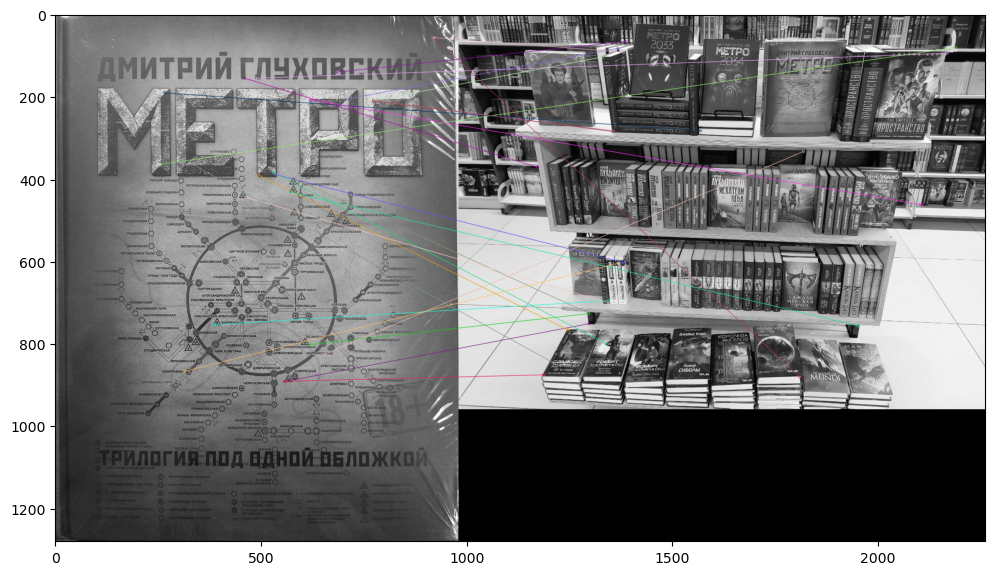

In [12]:
display(metro_matches)

In [13]:
# Create SIFT Object
sift = cv2.xfeatures2d.SIFT_create()

# # find the keypoints and descriptors with ORB
kp1, des1 = sift.detectAndCompute(metro,None)
kp2, des2 = sift.detectAndCompute(shell,None)

# BFMatcher with default params
bf = cv2.BFMatcher()

# Match descriptors
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])
        
# cv2.drawMatchesKnn expects list of lists as matches
sift_mathces = cv2.drawMatchesKnn(metro,kp1,shell,kp2,good,None,flags=2)

In [14]:
len(good)

163

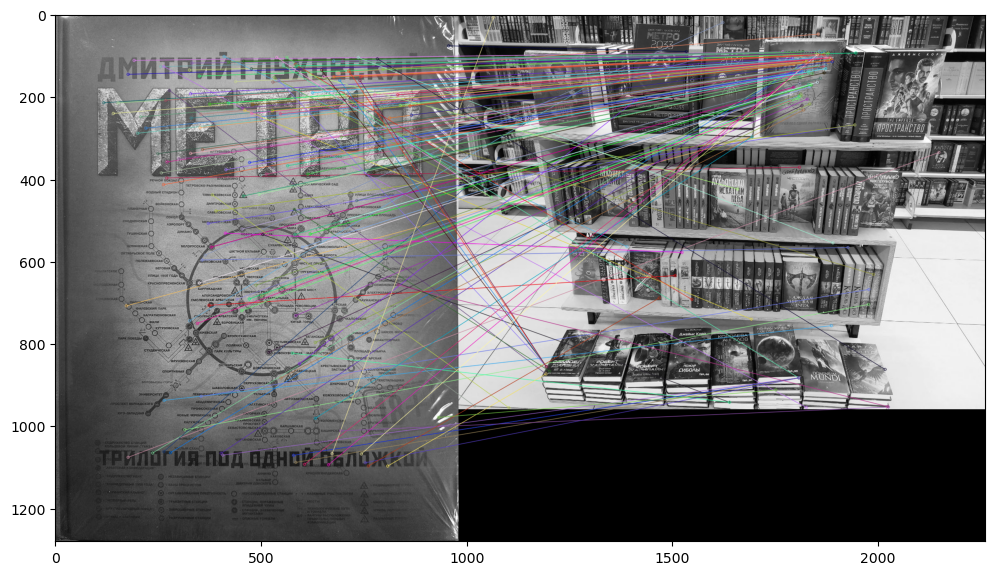

In [15]:
display(sift_mathces)

In [16]:
# Create SIFT Object
sift = cv2.xfeatures2d.SIFT_create()

# # find the keypoints and descriptors with ORB
kp1, des1 = sift.detectAndCompute(metro,None)
kp2, des2 = sift.detectAndCompute(shell,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []
# ratio test

for i, (match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        good.append([match1])
        
flann_matches = cv2.drawMatchesKnn(metro,kp1,shell,kp2,good,None, flags=2)

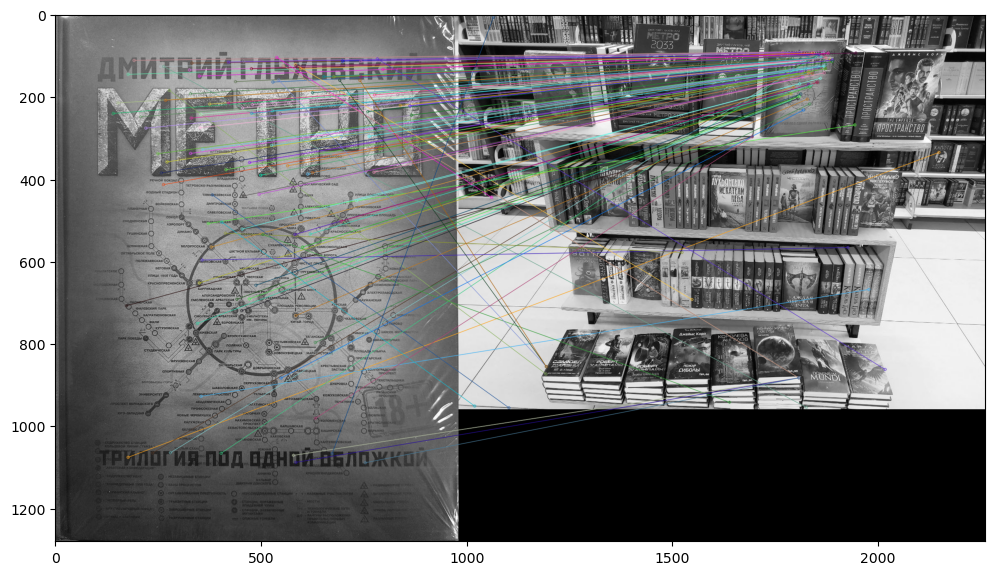

In [17]:
display(flann_matches)

In [18]:
# Create SIFT Object
sift = cv2.xfeatures2d.SIFT_create()

# # find the keypoints and descriptors with ORB
kp1, des1 = sift.detectAndCompute(metro,None)
kp2, des2 = sift.detectAndCompute(shell,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

matchesMask = [[0,0] for i in range(len(matches))]

# ratio test

for i, (match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]
        
draw_params = dict(matchColor = (0,255,0),
                  singlePointColor = (255,0,0),
                  matchesMask = matchesMask,
                  flags = 0)
        
flann_matches = cv2.drawMatchesKnn(metro,kp1,shell,kp2,matches,None,**draw_params)

In [19]:
len(matchesMask)

6100

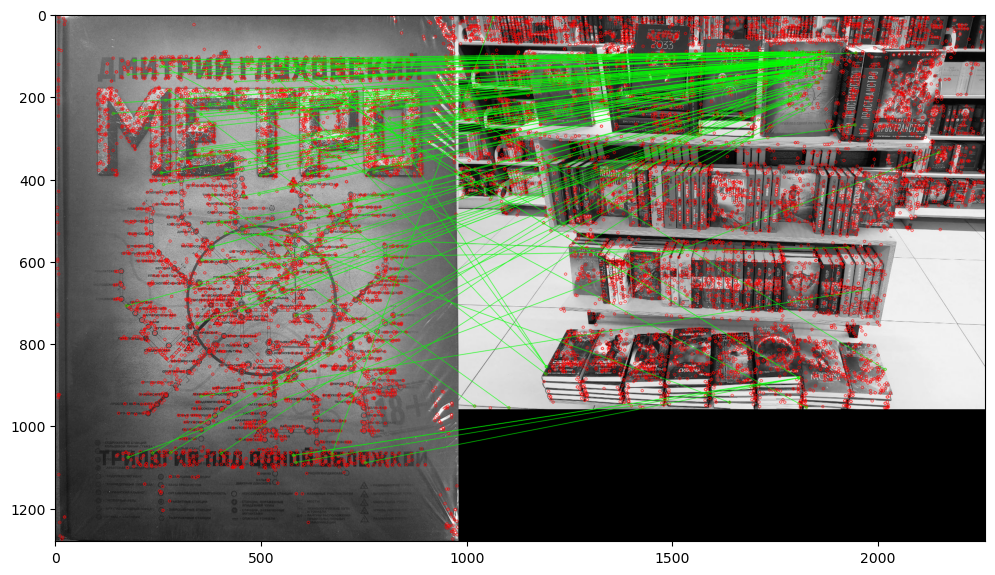

In [20]:
display(flann_matches)

# 2

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')
nose_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_mcs_nose.xml')

In [22]:

cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,  480))
while True:
    
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face_rects = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(frame, (x,y), (x+w,y+h),(0,255,0))
        roi_face = frame[y:y+h, x:x+w]
        roi_gray = gray[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))
        nose = nose_cascade.detectMultiScale(roi_gray, scaleFactor=1.3, minNeighbors=5, minSize=(50, 50))
        
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_face, (ex,ey), (ex+ew,ey+eh),(0,0,255),3)
            
        for (mx,my,mw,mh) in nose:
            cv2.rectangle(roi_face, (mx,my), (mx+mw,my+mh),(255,0,0),3)
    frame = cv2.flip(frame, 1)
    # write the flipped frame
    out.write(frame)
    # cv2.flip(frame, 1)
    cv2.imshow('Face Detection', frame)
       
    
    k = cv2.waitKey(1)
    if k == 27:
        break
out.release()
cap.release()
cv2.destroyAllWindows()
    

# 3

In [23]:
cap = cv2.VideoCapture('C:\\Users\\aliha\\Desktop\\Third\\Computer Vision\\W3\DATA\\cars.mp4')

In [24]:
import cv2
import os
import time
# print("file exists?", os.path.exists('C:\\Users\\aliha\\Desktop\\Third\\Computer Vision\\DATA\\cars.mp4'))
cap = cv2.VideoCapture('C:\\Users\\aliha\\Desktop\\Third\\Computer Vision\\DATA\\cars.mp4')

if (cap.isOpened()== False): 
    print("Error opening video stream or file")

car_plate_cascade = cv2.CascadeClassifier('C:\\Users\\aliha\\Desktop\\Third\\Computer Vision\\W3\DATA\\haarcascades\\haarcascade_russian_plate_number.xml')

def detect_and_blur_plate(img):
    img_2 = img.copy()
    plate = car_plate_cascade.detectMultiScale(img_2, scaleFactor = 1.1, minNeighbors = 3)
    for (x, y, w, h) in plate:
        roi = img_2[y: y + h, x: x + w]
        roi_blur = cv2.medianBlur(roi, 9)
        img_2[y: y + h, x: x + w] = roi_blur
  
    return img_2
    
fps =80
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('car_plate.avi', fourcc, 20.0, (640,  480))
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        frame = cv2.resize(frame, (640, 480))
        time.sleep(1/fps)
        frame = detect_and_blur_plate(frame)
        out.write(frame)
        cv2.imshow('frame', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
out.release()
cap.release()
cv2.destroyAllWindows()


# Segmetation

In [25]:
n_markers = 10

In [26]:
# default settings
current_marker = 1
marks_updated = False

In [27]:
def mouse_callback(event, x, y, flags, param):
    global marks_updated 

    if event == cv2.EVENT_LBUTTONDOWN:
        
        cv2.circle(marker_image, (x, y), 10, (current_marker), -1)
                
        cv2.circle(river_copy, (x, y), 10, colors[current_marker], -1)
        marks_updated = True

In [42]:
cv2.namedWindow('River Image')
cv2.setMouseCallback('River Image', mouse_callback)

while True:
    
    # Show the 2 windows
    cv2.imshow('WaterShed Segments', segments)
    cv2.imshow('River Image', river_copy)

    k = cv2.waitKey(1)

    if k == 27:
        break
        
    # Clear all colors and start over if 'c' is pressed
    elif k == ord('c'):
        river_copy = river.copy()
        marker_image = np.zeros(river.shape[0:2], dtype=np.int32)
        segments = np.zeros(river.shape,dtype=np.uint8)
       
  
    elif k > 0 and chr(k).isdigit():      
        current_marker  = int(chr(k))
   
    if marks_updated:
        
        marker_image_copy = marker_image.copy()
        cv2.watershed(river, marker_image_copy)
        
        segments = np.zeros(river.shape,dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
        
        marks_updated = False
        
cv2.destroyAllWindows()

# Custom Seeds with the WaterShed Algorithm

In [17]:
import cv2
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

# Read in the Image and make a Copy

In [18]:
river = cv2.imread('../DATA/amazon.jpg')
river = cv2.resize(river, (640, 480))

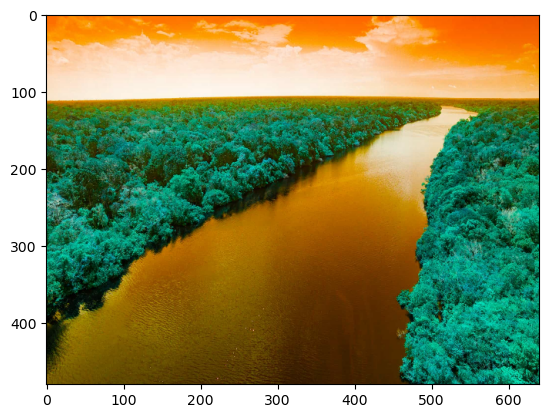

In [19]:
plt.imshow(river)

### Create an empty space for the the result to be drawn

In [20]:
river.shape
river_copy = np.copy(river)

In [21]:
marker_image = np.zeros(river.shape[:2],dtype=np.int32)

In [22]:
segments = np.zeros(river.shape, dtype=np.uint8)

In [23]:
segments.shape

(480, 640, 3)

# Create colors for Markers
* https://matplotlib.org/examples/color/colormaps_reference.html

In [24]:
from matplotlib import cm

# Returns (R,G,B,Alpha)

In [25]:
def create_rgb(i):
    x = np.array(cm.tab10(i))[:3]*255
    return tuple(x)

In [26]:
colors = []

In [27]:
for i in range(10):
    colors.append(create_rgb(i))

In [28]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

# Setting Up Callback Function

In [29]:
n_markers = 10

In [30]:
# default settings
current_marker = 1
marks_updated = False

In [31]:
def mouse_callback(event, x, y, flags, param):
    global marks_updated 

    if event == cv2.EVENT_LBUTTONDOWN:
        
        cv2.circle(marker_image, (x, y), 10, (current_marker), -1)
                
        cv2.circle(river_copy, (x, y), 10, colors[current_marker], -1)
        marks_updated = True

In [36]:
cv2.namedWindow('River Image')
cv2.setMouseCallback('River Image', mouse_callback)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('segmentation.avi', fourcc, 20.0, (640,  480))
while True:
    out.write(segments)
    
    # Show the 2 windows
    cv2.imshow('WaterShed Segments', segments)
    cv2.imshow('River Image', river_copy)

    k = cv2.waitKey(1)

    if k == 27:
        break
        
    # Clear all colors and start over if 'c' is pressed
    elif k == ord('c'):
        river_copy = river.copy()
        marker_image = np.zeros(river.shape[0:2], dtype=np.int32)
        segments = np.zeros(river.shape,dtype=np.uint8)
       
  
    elif k > 0 and chr(k).isdigit():      
        current_marker  = int(chr(k))
   
    if marks_updated:
        
        marker_image_copy = marker_image.copy()
        cv2.watershed(river, marker_image_copy)
        
        segments = np.zeros(river.shape,dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
        
        marks_updated = False
out.release()        
cv2.destroyAllWindows()


In [20]:
chr(52)

'4'